In [24]:
#Bit of a learning exercise--never tuned a XGB.  Basically doing a grid search and looking at what params do.
#Yes tuning each one individually, not looking at interactions. Baby Steps.
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
%matplotlib inline
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
loss=train['loss']
ids=train['id']
#just lazy as I already munged in the data in Allstate Basic, so I reload the munged data.
train=pd.read_csv('../data/train_ohe.csv')
train.drop(['loss'],inplace=True,axis=1)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [25]:
kf = KFold(n_splits=3)

In [ ]:
from sklearn.model_selection import train_test_split
#xgbmodel needs optimize
X_train, X_test, y_train, y_test = train_test_split(train, loss, test_size=0.1, random_state=42)
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
watchlist  = [(dtrain,'train'),(dtest,'test')]
a=[0.05,0.1,0.5,1,5,10]
eta=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':6, 
             'eta':i, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0.95,
             'subsample': 0.8,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    eta=np.append(eta,[i])
    MAE=np.append(MAE,[mae])
plt.scatter(eta, MAE, alpha=0.5)
plt.show()

In [ ]:
import xgboost as xgb
depth=[6,7,8,9]
sub=[0.1,0.2,0.3,0.4,0.5,0.6]
mcw=[1,2,3]
step=0
watchlist  = [(dtrain,'train'),(dtest,'test')]
results=pd.DataFrame(columns=['depth','sub_sample','min_child_wt','MAE'])
for i in depth:
    for j in sub:
        for k in mcw:
            for train_idx,test_idx in kf.split(train):
                param = {'max_depth':i, 
                         'eta':0.1, 
                         'silent':False, 
                         'objective':'reg:linear', 
                         'verbose_eval':True, 
                         'eval_metric' : 'mae', 
                         'colsample_bytree': 0.95,
                         'subsample': j,
                         'nthread': 4,
                         'min_child_weight': k
                        }
                num_round = 250
                X_train, X_test, y_train, y_test = train.loc[train_idx,], train.loc[test_idx,], loss.loc[train_idx,], loss.loc[test_idx,]
                dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
                dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
                bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
                pred=bst.predict(dtest)
                mae=mean_absolute_error(y_test,pred)
                temp=[i,j,k,mae]
                results.loc[step,:]=temp
                step=step+1
                mae=mean_absolute_error(y_test,pred)


Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2738.857178	test-mae:2734.715576
[1]	train-mae:2469.452393	test-mae:2465.170410
[2]	train-mae:2236.483154	test-mae:2232.246338
[3]	train-mae:2042.761230	test-mae:2038.227539
[4]	train-mae:1885.405151	test-mae:1880.743896
[5]	train-mae:1758.441040	test-mae:1754.317261
[6]	train-mae:1654.027832	test-mae:1650.788452
[7]	train-mae:1572.764282	test-mae:1570.837646
[8]	train-mae:1509.372681	test-mae:1508.650879
[9]	train-mae:1458.642578	test-mae:1458.795044
[10]	train-mae:1415.704834	test-mae:1417.601929
[11]	train-mae:1380.676758	test-mae:1383.241943
[12]	train-mae:1356.024902	test-mae:1359.604858
[13]	train-mae:1337.419067	test-mae:1341.978638
[14]	train-mae:1323.052612	test-mae:1327.996216
[15]	train-mae:1311.556885	test-mae:1317.324463
[16]	train-mae:1299.756226	test-mae:1306.454346
[17]	train-mae:1290.528809	test-mae:1297.921997
[18]	train-mae:1283.859985	test-mae:1291.854248
[19]	train-mae:1278.822144	test-mae:128

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2735.819336	test-mae:2732.093750
[1]	train-mae:2467.237305	test-mae:2463.984131
[2]	train-mae:2236.424316	test-mae:2231.821045
[3]	train-mae:2040.761353	test-mae:2036.651001
[4]	train-mae:1879.353271	test-mae:1875.203857
[5]	train-mae:1749.599976	test-mae:1745.072998
[6]	train-mae:1645.313232	test-mae:1640.568848
[7]	train-mae:1562.853394	test-mae:1559.351440
[8]	train-mae:1497.583740	test-mae:1494.694580
[9]	train-mae:1448.372559	test-mae:1445.242920
[10]	train-mae:1408.725952	test-mae:1405.675171
[11]	train-mae:1374.561523	test-mae:1372.251831
[12]	train-mae:1351.067749	test-mae:1348.630005
[13]	train-mae:1332.358154	test-mae:1330.040894
[14]	train-mae:1317.261230	test-mae:1315.651733
[15]	train-mae:1303.570801	test-mae:1302.528198
[16]	train-mae:1294.229248	test-mae:1293.254517
[17]	train-mae:1287.551880	test-mae:1287.373169
[18]	train-mae:1282.610107	test-mae:1281.881348
[19]	train-mae:1278.491821	test-mae:127

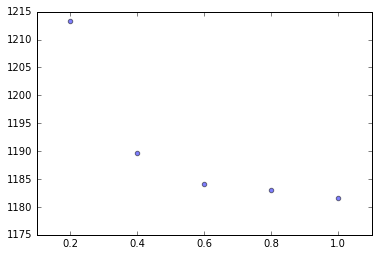

In [14]:
a=[0.2,0.2,0.4,0.5,0.6]
subsam=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':7, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0..95,
             'subsample': i,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    subsam=np.append(subsam,[i])
    MAE=np.append(MAE,[mae])
plt.scatter(subsam, MAE, alpha=0.5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#xgbmodel needs optimize
X_train, X_test, y_train, y_test = train_test_split(train, loss, test_size=0.1, random_state=42)
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
watchlist  = [(dtrain,'train'),(dtest,'test')]
a=[0.2,0.4,0.6,0.8,0.95]
treesam=np.array([])
MAE=np.array([])
for i in a:
    param = {'max_depth':7, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': i,
             'subsample': 0.95,
             'nthread': 4,
             'min_child_weight': 1
            }
    num_round = 250
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    treesam=np.append(treesam,[i])
    MAE=np.append(MAE,[mae])
    plt.scatter(treesam, MAE, alpha=0.5)
    plt.show()

In [4]:
MAE

array([ 1186.91159028,  1182.24115047,  1182.11872279,  1180.67094374,
        1183.93790477])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train, loss, test_size=0.1, random_state=42)
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
watchlist  = [(dtrain,'train'),(dtest,'test')]
param = {'max_depth':7, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0.95,
             'subsample': 0.8,
             'nthread': 4,
             'min_child_weight': 1
            }
num_round = 50
bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10,evals_result=a)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2734.744385	test-mae:2730.660400
[1]	train-mae:2466.093750	test-mae:2462.786133
[2]	train-mae:2233.464111	test-mae:2229.257324
[3]	train-mae:2036.629395	test-mae:2032.657349
[4]	train-mae:1875.179932	test-mae:1871.906372
[5]	train-mae:1744.771606	test-mae:1741.667969
[6]	train-mae:1637.293579	test-mae:1634.812500
[7]	train-mae:1551.530396	test-mae:1550.025269
[8]	train-mae:1484.910034	test-mae:1483.306763
[9]	train-mae:1429.889282	test-mae:1429.479858
[10]	train-mae:1385.345337	test-mae:1386.539673
[11]	train-mae:1351.232056	test-mae:1353.692139
[12]	train-mae:1325.178833	test-mae:1327.689087
[13]	train-mae:1304.976685	test-mae:1308.094971
[14]	train-mae:1287.987793	test-mae:1291.917969
[15]	train-mae:1275.738525	test-mae:1281.067871
[16]	train-mae:1265.178833	test-mae:1271.732422
[17]	train-mae:1255.660400	test-mae:1263.101685
[18]	train-mae:1249.161621	test-mae:1257.720825
[19]	train-mae:1243.952393	test-mae:125

In [1]:
#Bit of a learning exercise--never tuned a XGB.  Basically doing a grid search and looking at what params do.
#Yes tuning each one individually, not looking at interactions. Baby Steps.
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
%matplotlib inline
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
loss=train['loss']
ids=train['id']
#just lazy as I already munged in the data in Allstate Basic, so I reload the munged data.
train=pd.read_csv('../data/train_ohe.csv')
train.drop(['loss'],inplace=True,axis=1)
import matplotlib.pyplot as plt

In [10]:
import xgboost as xgb
dtrain = xgb.DMatrix(train,label=loss)


In [ ]:

param = {'max_depth':3, 
             'eta':0.1, 
             'silent':False, 
             'objective':'reg:linear', 
             'verbose_eval':True, 
             'eval_metric' : 'mae', 
             'colsample_bytree': 0.95,
             'subsample': 0.8,
             'nthread': 4,
             'min_child_weight': 1
            }
xgb.cv(param, dtrain, num_boost_round=5, nfold=3)

C:\Anaconda3\lib\site-packages\xgboost-0.4-py3.5.egg\xgboost\training.py:270: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  idset = [randidx[(i * kstep): min(len(randidx), (i + 1) * kstep)] for i in range(nfold)]


In [12]:
del test


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
X1=np.array(a['test']['mae'])
X2=np.array(a['train']['mae'])
X1.shape

(50,)

(0, 50)

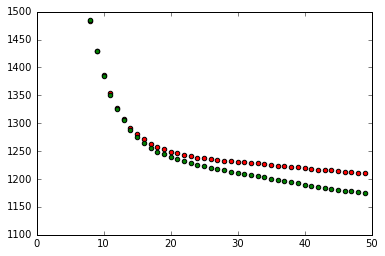

In [48]:
plt.scatter(X,X1,c='r')
plt.scatter(X,X2,c='g')
plt.ylim(1100,1500)
plt.xlim(0,50)

In [30]:
X1=X1.reshape(50,1)

In [6]:
results=pd.DataFrame(columns=['depth','sub_sample','min_child_wt','MAE'])

In [4]:
results

,depth,sub_sample,min_child_wt,MAE


In [7]:
a=[5,4,3,1523]
results.append(a,axis=0)

TypeError: append() got an unexpected keyword argument 'axis'

In [8]:
results.loc[0,]=a

In [9]:
results

,depth,sub_sample,min_child_wt,MAE
0,5,4,3,1523


In [12]:
depth

array([], dtype=float64)

In [28]:
for x,y in kf.split(train):
    print(train.loc[x,:],train.loc[y,:])

        cat1  cat10  cat11  cat12  cat13  cat14  cat15  cat16  cat17  cat18  \
62773      1      0      0      0      0      0      0      0      0      0   
62774      1      0      0      0      0      0      0      0      0      0   
62775      0      0      0      0      0      0      0      0      0      0   
62776      0      1      0      1      1      0      0      0      0      0   
62777      1      0      0      0      0      0      0      0      0      0   
62778      0      0      0      0      0      0      0      0      0      0   
62779      0      1      0      1      0      0      0      1      0      0   
62780      1      0      0      0      0      0      0      0      0      0   
62781      0      0      0      0      0      0      0      0      0      0   
62782      1      0      0      0      0      0      0      0      0      0   
62783      0      0      0      0      0      0      0      0      0      0   
62784      0      0      0      0      0      0     

In [23]:
train

array([ 62773,  62774,  62775, ..., 188315, 188316, 188317])

In [32]:
 mae=mean_absolute_error(y_test,pred)

In [33]:
mae

1232.1126847628386

In [36]:
bst.ev

1231.786621

In [5]:
#Bit of a learning exercise--never tuned a XGB.  Basically doing a grid search and looking at what params do.
#Yes tuning each one individually, not looking at interactions. Baby Steps.
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
%matplotlib inline
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
loss=train['loss']
ids=train['id']
#just lazy as I already munged in the data in Allstate Basic, so I reload the munged data.
train=pd.read_csv('../data/train_ohe.csv')
train.drop(['loss'],inplace=True,axis=1)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
watchlist  = [(dtrain,'train'),(dtest,'test')]


In [6]:
import xgboost as xgb
for train_idx,test_idx in kf.split(train):
    param = {'max_depth':7, 
            'eta':0.1, 
            'silent':False, 
            'objective':'reg:linear', 
            'verbose_eval':True, 
            'eval_metric' : 'mae', 
            'colsample_bytree': 0.30,
            'subsample': .95,
            'nthread': 4,
            'min_child_weight':4
                        }
    num_round = 250
    X_train, X_test, y_train, y_test = train.loc[train_idx,], train.loc[test_idx,], loss.loc[train_idx,], loss.loc[test_idx,]
    dtrain = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
    dtest = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())
    bst = xgb.train(param, dtrain, num_round, watchlist,early_stopping_rounds=10)
    pred=bst.predict(dtest)
    mae=mean_absolute_error(y_test,pred)
    print(mae)

Will train until test error hasn't decreased in 10 rounds.
[0]	train-mae:2735.222900	test-mae:2732.270264
[1]	train-mae:2467.200684	test-mae:2463.155029
[2]	train-mae:2234.000488	test-mae:2229.534180
[3]	train-mae:2039.475220	test-mae:2035.904541
[4]	train-mae:1878.921509	test-mae:1875.005981
[5]	train-mae:1749.386719	test-mae:1745.768555
[6]	train-mae:1648.433105	test-mae:1645.557983
[7]	train-mae:1563.784790	test-mae:1562.391357
[8]	train-mae:1495.462646	test-mae:1495.104736
[9]	train-mae:1443.255493	test-mae:1444.517700
[10]	train-mae:1402.566650	test-mae:1404.636230
[11]	train-mae:1370.055542	test-mae:1373.453979
[12]	train-mae:1340.796753	test-mae:1346.080933
[13]	train-mae:1320.828613	test-mae:1328.126831
[14]	train-mae:1303.250732	test-mae:1311.936035
[15]	train-mae:1290.713623	test-mae:1300.769531
[16]	train-mae:1279.806763	test-mae:1291.842163
[17]	train-mae:1272.491821	test-mae:1285.994995
[18]	train-mae:1265.805542	test-mae:1280.385498
[19]	train-mae:1260.275391	test-mae:127

NameError: name 'i' is not defined